In [8]:
!pip install keras

In [9]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=3b7110837bba63837f32883e28fd7895bff7014a7d9a458b4542d8642435cb31
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [1]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# suppress warning/error messages in terminal
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:

# load in data from mnist dataset (60k training, 10k test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
# reshape and convert to one-hot
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [5]:

# split main training set into train/validation sets (6k out of 60k data points reserved for validation)
x_validate = x_train[:6000, :]
y_validate = y_train[:6000, :]
x_train = x_train[6000:, :]
y_train = y_train[6000:, :]


In [6]:
'''
Building layers for the feedforward NN:
Hidden layers have 56, 96, 96, and 56 nodes, in that order.
Takes in 784 values (pixel input) and outputs 10 values (predicted probability for each number, 0-9).
'''

'\nBuilding layers for the feedforward NN:\nHidden layers have 56, 96, 96, and 56 nodes, in that order.\nTakes in 784 values (pixel input) and outputs 10 values (predicted probability for each number, 0-9).\n'

In [7]:
model = models.Sequential()
model.add(layers.Dense(56,activation='relu',input_shape=(784,)))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(56,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:

# training the NN
epochs = 5
history = model.fit(x_train,y_train,epochs=epochs,batch_size=512,verbose=2,validation_data=(x_validate,y_validate))
print("Finished fitting.")


Epoch 1/5
106/106 - 3s - loss: 3.1707 - accuracy: 0.6457 - val_loss: 0.7015 - val_accuracy: 0.8218 - 3s/epoch - 24ms/step
Epoch 2/5
106/106 - 1s - loss: 0.5691 - accuracy: 0.8490 - val_loss: 0.4674 - val_accuracy: 0.8745 - 1s/epoch - 12ms/step
Epoch 3/5
106/106 - 1s - loss: 0.3805 - accuracy: 0.8935 - val_loss: 0.3635 - val_accuracy: 0.9017 - 1s/epoch - 12ms/step
Epoch 4/5
106/106 - 1s - loss: 0.2916 - accuracy: 0.9164 - val_loss: 0.3187 - val_accuracy: 0.9163 - 1s/epoch - 12ms/step
Epoch 5/5
106/106 - 1s - loss: 0.2382 - accuracy: 0.9316 - val_loss: 0.2917 - val_accuracy: 0.9233 - 1s/epoch - 12ms/step
Finished fitting.


Checking accuracy on test set...
20/20 [==============================] - 0s 7ms/step - loss: 0.3051 - accuracy: 0.9175

Accuracy on test set: 0.9175000190734863


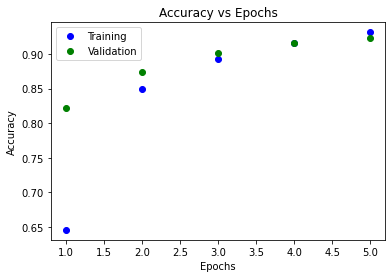

In [10]:
# plotting learning curves during training (on both training and validation data)
epoch_labels = range(1, epochs+1)
hist_dict = history.history
plt.title("Accuracy vs Epochs")
plt.plot(epoch_labels, hist_dict['accuracy'],'bo', label="Training")
plt.plot(epoch_labels, hist_dict["val_accuracy"],'go', label="Validation")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# evaluating final performance using test data
print("Checking accuracy on test set...")
acc = model.evaluate(x_test,y_test,batch_size=512)
print("\nAccuracy on test set: " + str(acc[1]))
plt.show()